In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
# Define constants
img_size = 128
batch_size = 32
num_classes = 26

data_dir = 'Dataset'

In [8]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    validation_split=0.2,
    # rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
)

# Data preprocessing for validation and testing data (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    data_dir + '/val',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False  # No need to shuffle for validation
)

# Load testing data
test_generator = val_test_datagen.flow_from_directory(
    data_dir + '/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False  # No need to shuffle for testing
)

Found 11415 images belonging to 26 classes.
Found 1415 images belonging to 26 classes.
Found 1453 images belonging to 26 classes.


In [9]:
# Define CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

c:\Users\Priyanshu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


c:\Users\Priyanshu\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


356/356 ━━━━━━━━━━━━━━━━━━━━ 71s 190ms/step - accuracy: 0.4844 - loss: 2.1108 - val_accuracy: 0.9759 - val_loss: 0.0736
Epoch 2/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - accuracy: 0.9375 - loss: 0.0651 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 3/10


c:\Users\Priyanshu\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


356/356 ━━━━━━━━━━━━━━━━━━━━ 65s 181ms/step - accuracy: 0.9698 - loss: 0.1033 - val_accuracy: 0.9901 - val_loss: 0.0280
Epoch 4/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - accuracy: 0.9688 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss: 5.8024e-04
Epoch 5/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 65s 181ms/step - accuracy: 0.9912 - loss: 0.0354 - val_accuracy: 0.9979 - val_loss: 0.0083
Epoch 6/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 1.5565e-05
Epoch 7/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 68s 190ms/step - accuracy: 0.9963 - loss: 0.0147 - val_accuracy: 0.9972 - val_loss: 0.0101
Epoch 8/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 9/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 68s 189ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9950 - val_loss: 0.0158
Epoch 10/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step - accuracy: 1.0000 - loss: 0.0026 

In [10]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator, steps=val_generator.samples // batch_size)
print(f'Validation accuracy: {accuracy}')

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Testing accuracy: {test_accuracy}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9953 - loss: 0.0109
Validation accuracy: 0.9950284361839294
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9954 - loss: 0.0117
Testing accuracy: 0.9965277910232544


In [11]:
# Save the model
model_path = 'Trained_Model/CNN_Model.keras'
model.save(model_path)

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,314,064 (169.04 MB)

 Trainable params: 14,771,354 (56.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,542,710 (112.70 MB)

None


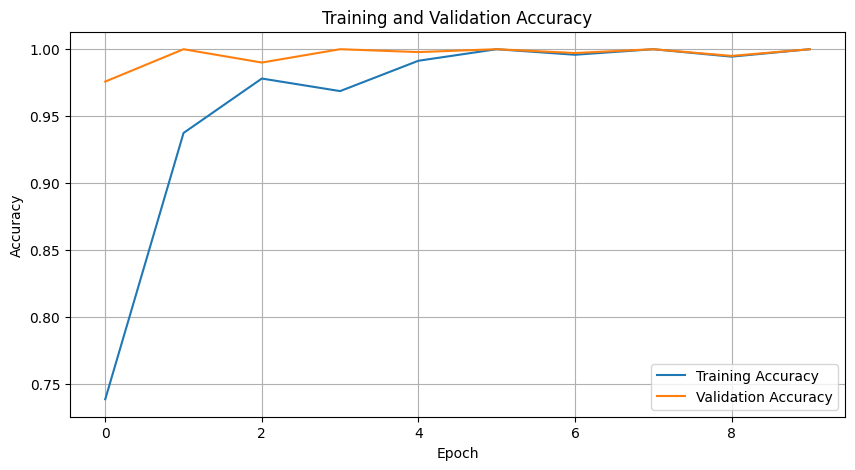

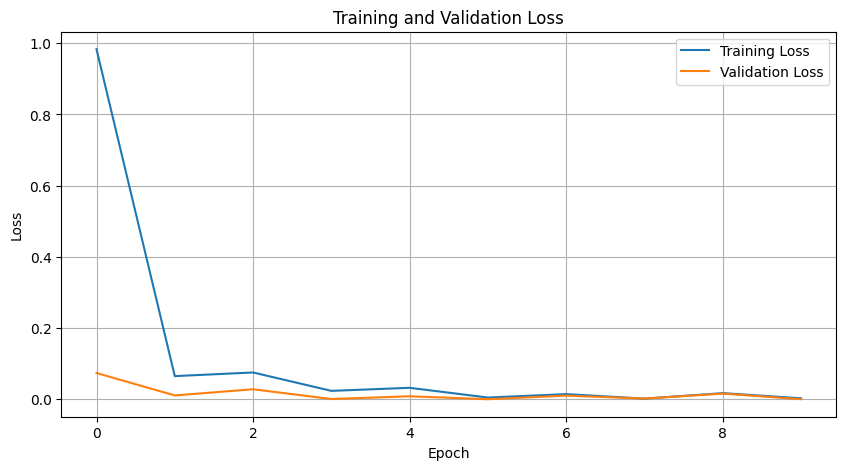

In [12]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [13]:
# Obtain true labels and predicted labels
true_labels = test_generator.classes
predictions_probabilities = model.predict(test_generator)
predicted_labels = np.argmax(predictions_probabilities, axis=1)

# Compute the confusion matrix
cMatrix = confusion_matrix(true_labels, predicted_labels)
cMatrix

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 61,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 51,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 

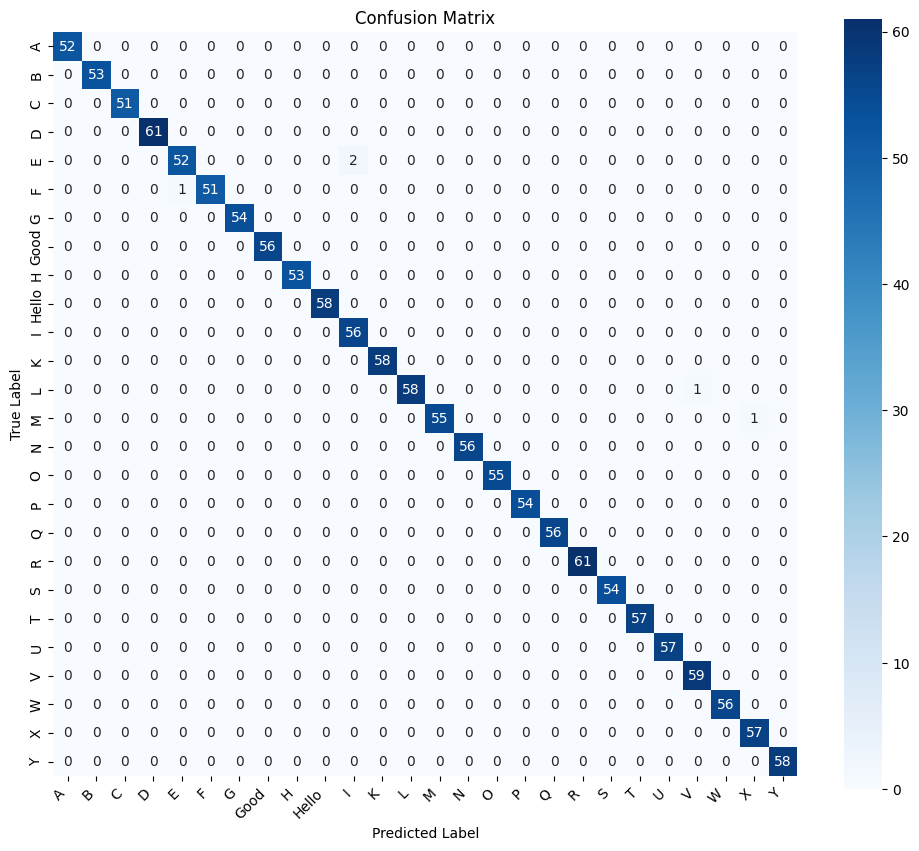

In [15]:
gesture = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Good', 'H', 'Hello', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=gesture, yticklabels=gesture)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right') 
plt.show()